In [1]:
from shapely import Point, LineString, Polygon

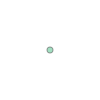

In [2]:
point = Point(1, 2)
point

In [3]:
print(point)

POINT (1 2)


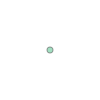

In [4]:
point_3d = Point(2, 4, 1)
point_3d

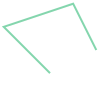

In [5]:
point_1 = Point(0, 0)
point_2 = Point(-1, 1)
point_3 = Point(0.5, 1.5)
point_4 = Point(1, 0.5)

list_of_points = [point_1, point_2, point_3, point_4]

line = LineString(list_of_points)
line

In [6]:
print(line.length)
print(line.centroid)

4.11338638120718
POINT (-0.0641481185309257 0.9241933422325408)


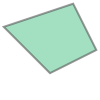

In [7]:
polygon = Polygon(list_of_points)
polygon

In [8]:
print(polygon.centroid)
print(polygon.area)
print(polygon)

POINT (0.0897435897435897 0.7692307692307693)
1.625
POLYGON ((0 0, -1 1, 0.5 1.5, 1 0.5, 0 0))


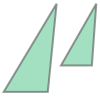

In [9]:
from shapely import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint(
    [Point(1, 2), Point(3, 4)]
)
multiline = MultiLineString(
    [LineString([(1, 7), (6, 4)]), LineString([(0, -1), (-4, 5)])]
)
multipoly = MultiPolygon(
    [Polygon([(0, 0), (-10, 0), (2, 20)]), Polygon([(3, 6), (10, 6), (11, 20)])]
)
multipoly